<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Reading-In-Data" data-toc-modified-id="Reading-In-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading In Data</a></span></li><li><span><a href="#Analyzing-Data" data-toc-modified-id="Analyzing-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyzing Data</a></span><ul class="toc-item"><li><span><a href="#High-Level-.describe()" data-toc-modified-id="High-Level-.describe()-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>High Level .describe()</a></span></li><li><span><a href="#Top-N-by-F1_real-and-F1_fake" data-toc-modified-id="Top-N-by-F1_real-and-F1_fake-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Top-N by F1_real and F1_fake</a></span><ul class="toc-item"><li><span><a href="#Paper-Table-for-Top-10-by-F1_real" data-toc-modified-id="Paper-Table-for-Top-10-by-F1_real-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Paper Table for Top 10 by F1_real</a></span></li><li><span><a href="#Paper-Table-for-Top-10-by-F1_fake" data-toc-modified-id="Paper-Table-for-Top-10-by-F1_fake-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Paper Table for Top 10 by F1_fake</a></span></li><li><span><a href="#Paper-Table-for-Top-by-Both--F1_fake-and-F1_real" data-toc-modified-id="Paper-Table-for-Top-by-Both--F1_fake-and-F1_real-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Paper Table for Top by Both  F1_fake and F1_real</a></span></li></ul></li><li><span><a href="#Now-lets-create-a-filter" data-toc-modified-id="Now-lets-create-a-filter-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Now lets create a filter</a></span></li><li><span><a href="#Finding-Maximum-CV-ROC-by-weight-scheme" data-toc-modified-id="Finding-Maximum-CV-ROC-by-weight-scheme-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Finding Maximum CV-ROC by weight scheme</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Plotting</a></span><ul class="toc-item"><li><span><a href="#Plotting-Analysis-of-Feature-N-gram-Sizes--(!!!-REWORK-IN-1-PLOT)" data-toc-modified-id="Plotting-Analysis-of-Feature-N-gram-Sizes--(!!!-REWORK-IN-1-PLOT)-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Plotting Analysis of Feature N-gram Sizes  (!!! REWORK IN 1 PLOT)</a></span></li><li><span><a href="#Plotting-Analysis-of-Weighting-Schemes" data-toc-modified-id="Plotting-Analysis-of-Weighting-Schemes-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Plotting Analysis of Weighting Schemes</a></span></li><li><span><a href="#Plotting-Analysis-of-Classifiers!!!" data-toc-modified-id="Plotting-Analysis-of-Classifiers!!!-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Plotting Analysis of Classifiers!!!</a></span></li></ul></li><li><span><a href="#ROC-curve-plots" data-toc-modified-id="ROC-curve-plots-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>ROC-curve plots</a></span><ul class="toc-item"><li><span><a href="#RUN-FROM-HERE-TO-CREATE-ROC-PLOTS" data-toc-modified-id="RUN-FROM-HERE-TO-CREATE-ROC-PLOTS-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>RUN FROM HERE TO CREATE ROC PLOTS</a></span></li></ul></li></ul></li></ul></div>

## Summary 

In this notebook we need to analyze the received experimental data and arrive to some ineteresting results and explanations that we'll add to the paper 

The metrics to consider for any analysis: 

 * "best" by ROC on CV and/or test (sometimes ROC is the 0 or -1 as an error, you should ignore those results)
 * another way to consider is "best" by F1: we have F1_fake and F1-real separately (more interetsed in fake actually but better to analyzie for both - see how Veronica and Rada did it in their paper).


What we might want to learn: 

* which experiment is the best overall?  

* which weight scheme gave the best results more frequently?  That is, may be the best weighting scheme. 
    
* which classifier performed better?  

* which feature combinations are better to use? 

* what are the feature vector sizes for what combinations? Any characteristics for those. Which potentially overfit and cannot be used on our dataset?   (might be useful in the future for larger datasets) 

* ... so on

As the result of this investigatin you should be able to  provide the following recommenation to the reader (very rough sample): 

we prepared this dataset for the Urdu language. Urdu doesn't have such tools as other languages that's why we didn't use the fancy features as in (Veronica and Rada, 2018) yet we tried to provide a baseline classifier and recommend the best set of readily available feature, i.e., N-grams of different types, as well as analyzed various hyperparameters such as weighting schemes for those features. We've tried our experiments using a number of popular and available classifiers and  found out that: 

* the best result was with such  n-gram combination - weighting scheme - classifier  (actually, by 2 or 3 metrics, we might get a few "bests")
* the overall consistently strongly performing weighting scheme is .... 
    * (also, logent and rela give aweful times but it might be because they are manually written by us - we'll see whether to add this) 
 
* the recommended classifier is.. 

* the promising n-gram combinations are ... (we need to exclude the combinatios with overly large feature #)



In [1]:
# IGNORE THIS: needed to make it run on Alisa's laptop 
import sys 
#sys.executable, sys.path
sys.path.append('/Users/alisa/workspace/Urdu_Fake_News/envname/lib/python3.7/site-packages')

#### Importing libraries

In [24]:
import pandas as pd 
import numpy as np
from pathlib import Path
from pandas import ExcelWriter
from pandas import ExcelFile

#### Reading In Data

In [25]:
results = pd.read_excel(Path('results7100.xlsx'))
results.shape

(7101, 26)

In [26]:
results.columns

Index(['Char-word-func-N-grams-combination', 'c', 'w', 'f', 'total_feat_num',
       'weight scheme', 'classifier', 'cv-acc', 'cv-balanced_acc',
       'cv-precision', 'cv-recall', 'cv-f1', 'cv-roc_auc', 'test-acc',
       'test-balanced_acc', 'test-real-precision', 'test-real-recall',
       'test-real-f1', 'test-fake-precision', 'test-fake-recall',
       'test-fake-f1', 'test-roc_auc', 'fpr', 'tpr', 'thresholds', 'Status'],
      dtype='object')

In [27]:
results.head()

,Char-word-func-N-grams-combination,c,w,f,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-precision,...,test-real-recall,test-real-f1,test-fake-precision,test-fake-recall,test-fake-f1,test-roc_auc,fpr,tpr,thresholds,Status
0,0-0-1 char-word-func,0,0,1,295.0,binary,LogisticRegression,0.51,0.49,0.56,...,0.60,0.60,0.52,0.51,0.51,0.58,[0. 0.00581395 0.00581395 0.03488372 0...,[0. 0. 0.00699301 0.00699301 0...,1.0,OK
1,0-0-1 char-word-func,0,0,1,295.0,binary,SVC,0.48,0.47,0.53,...,0.55,0.56,0.49,0.52,0.50,0.56,[0. 0.00581395 0.00581395 0.02325581 0...,[0. 0. 0.00699301 0.00699301 0...,1.0,OK
2,0-0-1 char-word-func,0,0,1,295.0,binary,SVC,0.55,0.49,0.56,...,0.97,0.69,0.14,0.01,0.01,0.82,[0. 0.00581395 0.05813953 0.06976744 0...,[0. 0.00699301 0.00699301 0.00699301 0...,1.0,OK
3,0-0-1 char-word-func,0,0,1,295.0,binary,DecisionTreeClassifier,0.47,0.46,0.53,...,0.53,0.52,0.39,0.36,0.38,0.45,[0. 0.53488372 1. ],[0. 0.63636364 1. ],1.0,OK
4,0-0-1 char-word-func,0,0,1,295.0,binary,RandomForestClassifier,0.58,0.53,0.57,...,0.94,0.70,0.52,0.08,0.13,0.54,[0. 0.00581395 0.01162791 0.01162791 0...,[0. 0. 0. 0.01398601 0...,1.0,OK


## Analyzing Data

### High Level .describe()

In [28]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7101 entries, 0 to 7100
Data columns (total 26 columns):
Char-word-func-N-grams-combination    7101 non-null object
c                                     7101 non-null int64
w                                     7101 non-null object
f                                     7101 non-null object
total_feat_num                        5917 non-null float64
weight scheme                         5917 non-null object
classifier                            5917 non-null object
cv-acc                                5917 non-null float64
cv-balanced_acc                       5917 non-null float64
cv-precision                          5917 non-null float64
cv-recall                             5917 non-null float64
cv-f1                                 5917 non-null float64
cv-roc_auc                            5917 non-null float64
test-acc                              5917 non-null float64
test-balanced_acc                     5917 non-null float64


In [29]:
# returns a boolean series indicating which values aren't NULL
# if it show "True" -  it means this value is not null
results.notnull()

,Char-word-func-N-grams-combination,c,w,f,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-precision,...,test-real-recall,test-real-f1,test-fake-precision,test-fake-recall,test-fake-f1,test-roc_auc,fpr,tpr,thresholds,Status
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [30]:
# returns a boolean series indicating which values aren't NULL
# if it show "False" -  it means this value is not null
# if it show "True" -  it means this value is null
results.isnull()

,Char-word-func-N-grams-combination,c,w,f,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-precision,...,test-real-recall,test-real-f1,test-fake-precision,test-fake-recall,test-fake-f1,test-roc_auc,fpr,tpr,thresholds,Status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
results.describe()

,c,total_feat_num,cv-acc,cv-balanced_acc,cv-precision,cv-recall,cv-f1,cv-roc_auc,test-acc,test-balanced_acc,test-real-precision,test-real-recall,test-real-f1,test-fake-precision,test-fake-recall,test-fake-f1,test-roc_auc,thresholds
count,7101.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.0
mean,610.016477,3650.995437,0.622895,0.602043,0.646045,0.776973,0.690825,0.651873,0.637615,0.620982,0.648807,0.798641,0.701651,0.670843,0.443355,0.479288,0.697490,1.0
std,1753.398153,2704.469533,0.105963,0.112344,0.098254,0.185052,0.102348,0.176041,0.101121,0.107978,0.098361,0.177423,0.093600,0.208013,0.262351,0.234544,0.156525,0.0
min,0.000000,12.000000,0.400000,0.360000,0.460000,0.320000,0.380000,0.210000,0.410000,0.390000,0.460000,0.350000,0.410000,0.000000,0.000000,0.000000,0.150000,1.0
25%,0.000000,1111.000000,0.540000,0.500000,0.560000,0.650000,0.620000,0.490000,0.550000,0.520000,0.560000,0.690000,0.650000,0.510000,0.230000,0.330000,0.560000,1.0
50%,1.000000,3264.000000,0.620000,0.610000,0.630000,0.790000,0.720000,0.710000,0.640000,0.630000,0.630000,0.820000,0.710000,0.670000,0.450000,0.520000,0.740000,1.0
75%,2.000000,5608.000000,0.710000,0.700000,0.740000,0.960000,0.770000,0.800000,0.700000,0.700000,0.730000,0.970000,0.770000,0.840000,0.680000,0.680000,0.810000,1.0
max,11092.000000,11092.000000,0.840000,0.830000,0.860000,1.000000,0.860000,0.920000,0.890000,0.880000,0.900000,1.000000,0.900000,1.000000,0.940000,0.870000,0.960000,1.0


Notice that the first three columns are not important because these are just different N-grams. So their stats don't really matter.


Look at the results and anayze each column.   What can we tell from this very high level analysis? 
Note that values -1 and 0 for ROC are when error occured or this metric could not be applied (not all classifiers support it, do you know why?) 

No, I dont know why? Can you please explain? 

For other metrics if the value is 0, so it is. 


### Paper Table for Top 10 by F1_real

In this section, we used all the parameters separatly:

(N-gram-feat-comb', 'char N-gram', 'word N-gram', 'func N-gram','total_feat_num', 'weight scheme', 'classifier', 'cv-acc','cv-balanced_acc', 'cv-roc', 'cv-f1-fake', 'acc', 'balanced_acc', 'roc','f1_fake', 'f1_real')

to find the best N gram size. 

In [34]:
# https://www.geeksforgeeks.org/get-n-largest-values-from-a-particular-column-in-pandas-dataframe/
top10_by_f1_real = results.nlargest(10, ['test-real-f1']) [['c', 'w', 'f', 'total_feat_num','weight scheme', 'classifier', 'test-balanced_acc', 
       'test-real-f1','test-fake-f1', 'test-roc_auc']]

In [35]:
top10_by_f1_real

,c,w,f,total_feat_num,weight scheme,classifier,test-balanced_acc,test-real-f1,test-fake-f1,test-roc_auc
5063,2,1,1,5891.0,tfidf,AdaBoostClassifier,0.88,0.90,0.86,0.95
5095,2,1,2,8690.0,binary,AdaBoostClassifier,0.88,0.90,0.86,0.95
5111,2,1,2,8690.0,tfidf,AdaBoostClassifier,0.88,0.90,0.86,0.95
5119,2,1,2,8690.0,norm,AdaBoostClassifier,0.88,0.90,0.87,0.95
5135,2,1,2,8690.0,none (tf),AdaBoostClassifier,0.88,0.90,0.87,0.95
4719,2,0,1,1961.0,logent,AdaBoostClassifier,0.86,0.89,0.85,0.95
4783,2,0,2,4760.0,norm,AdaBoostClassifier,0.86,0.89,0.85,0.95
4799,2,0,2,4760.0,none (tf),AdaBoostClassifier,0.86,0.89,0.85,0.95
4999,2,1,0,5596.0,binary,AdaBoostClassifier,0.87,0.89,0.86,0.95
5015,2,1,0,5596.0,tfidf,AdaBoostClassifier,0.86,0.89,0.84,0.95


### Paper Table for Top 10 by F1_fake

In [37]:
# https://www.geeksforgeeks.org/get-n-largest-values-from-a-particular-column-in-pandas-dataframe/
top10_by_f1_fake = results.nlargest(10, ['test-fake-f1']) [['c', 'w', 'f', 'total_feat_num','weight scheme', 'classifier', 'test-balanced_acc', 
       'test-real-f1','test-fake-f1', 'test-roc_auc']]

In [38]:
top10_by_f1_fake

,c,w,f,total_feat_num,weight scheme,classifier,test-balanced_acc,test-real-f1,test-fake-f1,test-roc_auc
5119,2,1,2,8690.0,norm,AdaBoostClassifier,0.88,0.90,0.87,0.95
5135,2,1,2,8690.0,none (tf),AdaBoostClassifier,0.88,0.90,0.87,0.95
4999,2,1,0,5596.0,binary,AdaBoostClassifier,0.87,0.89,0.86,0.95
5023,2,1,0,5596.0,norm,AdaBoostClassifier,0.87,0.89,0.86,0.95
5039,2,1,0,5596.0,none (tf),AdaBoostClassifier,0.87,0.89,0.86,0.95
5047,2,1,1,5891.0,binary,AdaBoostClassifier,0.87,0.89,0.86,0.95
5063,2,1,1,5891.0,tfidf,AdaBoostClassifier,0.88,0.90,0.86,0.95
5071,2,1,1,5891.0,norm,AdaBoostClassifier,0.87,0.89,0.86,0.95
5087,2,1,1,5891.0,none (tf),AdaBoostClassifier,0.87,0.89,0.86,0.95
5095,2,1,2,8690.0,binary,AdaBoostClassifier,0.88,0.90,0.86,0.95


In [40]:
set(results.nlargest(10, ['test-fake-f1']).index).intersection(set(results.nlargest(10, ['test-real-f1']).index))

{4999, 5063, 5095, 5119, 5135}

#### Old results for Top 10 by F1_real and F1_fake

In [41]:
top_by_both_f1_fake_and_real = results.loc[[4999, 5063, 5095, 5119, 5135], ['c', 'w', 'f', 'total_feat_num','weight scheme', 'classifier', 'test-balanced_acc', 
       'test-real-f1','test-fake-f1', 'test-roc_auc']]


top_by_both_f1_fake_and_real

,c,w,f,total_feat_num,weight scheme,classifier,test-balanced_acc,test-real-f1,test-fake-f1,test-roc_auc
4999,2,1,0,5596.0,binary,AdaBoostClassifier,0.87,0.89,0.86,0.95
5063,2,1,1,5891.0,tfidf,AdaBoostClassifier,0.88,0.90,0.86,0.95
5095,2,1,2,8690.0,binary,AdaBoostClassifier,0.88,0.90,0.86,0.95
5119,2,1,2,8690.0,norm,AdaBoostClassifier,0.88,0.90,0.87,0.95
5135,2,1,2,8690.0,none (tf),AdaBoostClassifier,0.88,0.90,0.87,0.95


#### Paper Table for Top by Both  F1_fake and F1_real

##### Histogram 

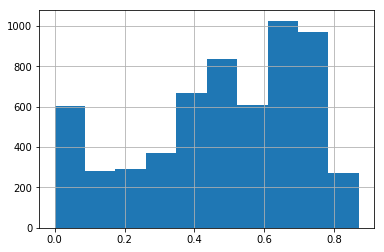

In [42]:
%matplotlib inline
results['test-fake-f1'].hist()

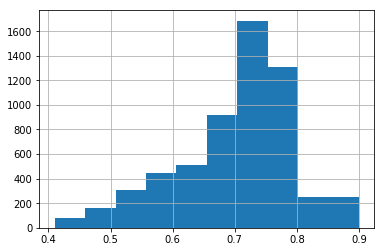

In [45]:
%matplotlib inline
results['test-real-f1'].hist()

#### New ROC 

In [47]:
results.nlargest(5, ['test-roc_auc']) 

,Char-word-func-N-grams-combination,c,w,f,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-precision,...,test-real-recall,test-real-f1,test-fake-precision,test-fake-recall,test-fake-f1,test-roc_auc,fpr,tpr,thresholds,Status
5188,2-1-4 char-word-func,2,1,4,6431.0,binary,RandomForestClassifier,0.72,0.68,0.67,...,1.00,0.77,1.00,0.29,0.45,0.96,[0. 0.00581395 0.02906977 0.04069767 0...,[0. 0. 0. 0. 0...,1.0,OK
5399,2-2-1 char-word-func,2,2,1,7911.0,tfidf,AdaBoostClassifier,0.80,0.79,0.80,...,0.94,0.89,0.91,0.79,0.85,0.96,[0. 0.00581395 0.36627907 0.37790698 0...,[0. 0. 0. 0. 0...,1.0,OK
6063,2-4-1 char-word-func,2,4,1,2570.0,logent,AdaBoostClassifier,0.81,0.80,0.80,...,0.92,0.89,0.89,0.82,0.85,0.96,[0. 0.00581395 0.24418605 0.25581395 0...,[0. 0. 0. 0. 0...,1.0,OK
4719,2-0-1 char-word-func,2,0,1,1961.0,logent,AdaBoostClassifier,0.80,0.79,0.80,...,0.92,0.89,0.90,0.80,0.85,0.95,[0. 0.00581395 0.09883721 0.09883721 0...,[0. 0. 0. 0.00699301 0...,1.0,OK
4735,2-0-1 char-word-func,2,0,1,1961.0,norm,AdaBoostClassifier,0.83,0.82,0.82,...,0.90,0.88,0.87,0.81,0.84,0.95,[0. 0.00581395 0.04651163 0.05813953 0...,[0. 0. 0. 0. 0...,1.0,OK


#### OLD ROC

In [25]:
results.nlargest(5, ['roc']) 

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
1956,2-0-1 char-word-func,2,0,1,1848,tfidf,RandomForestClassifier,0.66,0.62,0.86,0.34,0.74,0.69,0.96,0.55,0.81
156,2-2-2 char-word-func,2,2,2,11448,binary,RandomForestClassifier,0.63,0.59,0.88,0.28,0.72,0.67,0.95,0.52,0.80
204,2-1-0 char-word-func,2,1,0,5575,binary,RandomForestClassifier,0.64,0.60,0.89,0.30,0.74,0.69,0.95,0.55,0.81
252,2-0-1 char-word-func,2,0,1,1848,binary,RandomForestClassifier,0.66,0.62,0.88,0.33,0.74,0.69,0.95,0.55,0.81
488,2-0-0 char-word-func,2,0,0,1555,logent,LogisticRegression,0.55,0.50,0.88,0.00,0.57,0.50,0.95,0.00,0.73


We already notice that 2 - 0 - 1 , 2 - 0 -0 , or 2 - 1 -0 are teh best o the Cross-Validation runs. Will this hold for tests? (actually, for test never mind, the function didn't apply there - then check the F-scores, whether they stay high  for  CV and Test runs. If they are sufficiently high (show up in top5, top 10), then we are on a good track).   


Note that the 1st column is the # of the line in the result table and can be tretaed as the ID of an experiment 

This show us that meximum score of "f1_fake" =  0.85 and Meximum score of "f1_fake" = 0.89

Now, lets further investigate at what N-Gram, Weighting schemes are giving this results

The code below provides us illustration about what N-Gram, Weighting schemes are giving above results results

In [49]:
# classifiers having accuracy more than 75% AND weighting Scheme
results[(results.classifier == 'AdaBoostClassifier')| 
              (results.classifier == 'SVC')
              & (results['weight scheme'] == 'binary')
              & (results['cv-f1'] <80) & (results['test-fake-f1'] <80)
              & (results['test-roc_auc'] <75)].head(10)

,Char-word-func-N-grams-combination,c,w,f,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-precision,...,test-real-recall,test-real-f1,test-fake-precision,test-fake-recall,test-fake-f1,test-roc_auc,fpr,tpr,thresholds,Status
1,0-0-1 char-word-func,0,0,1,295.0,binary,SVC,0.48,0.47,0.53,...,0.55,0.56,0.49,0.52,0.50,0.56,[0. 0.00581395 0.00581395 0.02325581 0...,[0. 0. 0.00699301 0.00699301 0...,1.0,OK
2,0-0-1 char-word-func,0,0,1,295.0,binary,SVC,0.55,0.49,0.56,...,0.97,0.69,0.14,0.01,0.01,0.82,[0. 0.00581395 0.05813953 0.06976744 0...,[0. 0.00699301 0.00699301 0.00699301 0...,1.0,OK
7,0-0-1 char-word-func,0,0,1,295.0,binary,AdaBoostClassifier,0.57,0.55,0.59,...,0.78,0.68,0.58,0.36,0.44,0.61,[0. 0.00581395 0.01744186 0.01744186 0...,[0. 0. 0. 0.00699301 0...,1.0,OK
15,0-0-1 char-word-func,0,0,1,295.0,logent,AdaBoostClassifier,0.55,0.53,0.58,...,0.70,0.66,0.57,0.48,0.52,0.57,[0. 0. 0. 0.01162791 0...,[0. 0.00699301 0.02097902 0.02097902 0...,1.0,OK
23,0-0-1 char-word-func,0,0,1,295.0,tfidf,AdaBoostClassifier,0.56,0.53,0.58,...,0.80,0.70,0.63,0.40,0.49,0.64,[0. 0. 0.00581395 0.00581395 0...,[0. 0.00699301 0.00699301 0.01398601 0...,1.0,OK
31,0-0-1 char-word-func,0,0,1,295.0,norm,AdaBoostClassifier,0.54,0.52,0.58,...,0.77,0.68,0.60,0.43,0.50,0.66,[0. 0. 0.04651163 0.04651163 0...,[0. 0.00699301 0.00699301 0.01398601 0...,1.0,OK
47,0-0-1 char-word-func,0,0,1,295.0,none (tf),AdaBoostClassifier,0.54,0.52,0.58,...,0.77,0.68,0.60,0.43,0.50,0.66,[0. 0. 0.04651163 0.04651163 0...,[0. 0.00699301 0.00699301 0.01398601 0...,1.0,OK
49,0-0-2 char-word-func,0,0,2,3094.0,binary,SVC,0.46,0.45,0.52,...,0.52,0.53,0.45,0.48,0.46,0.50,[0. 0. 0.00581395 0.00581395 0...,[0. 0.00699301 0.00699301 0.06293706 0...,1.0,OK
50,0-0-2 char-word-func,0,0,2,3094.0,binary,SVC,0.56,0.50,0.56,...,0.99,0.71,0.50,0.01,0.01,0.67,[0. 0.00581395 0.01744186 0.02906977 0...,[0. 0.00699301 0.00699301 0.00699301 0...,1.0,OK
55,0-0-2 char-word-func,0,0,2,3094.0,binary,AdaBoostClassifier,0.55,0.52,0.57,...,0.81,0.69,0.60,0.34,0.44,0.55,[0. 0.00581395 0.01162791 0.01162791 0...,[0. 0. 0. 0.01398601 0...,1.0,OK


#### New

In [50]:
# classifiers having accuracy more than 75% AND weighting Scheme
results[(results.classifier == 'AdaBoostClassifier')
              & (results['weight scheme'] == 'binary')
              & (results['cv-f1'] <80) & (results['test-real-f1'] <80)
              & (results['test-roc_auc'] <75)].head(10)

,Char-word-func-N-grams-combination,c,w,f,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-precision,...,test-real-recall,test-real-f1,test-fake-precision,test-fake-recall,test-fake-f1,test-roc_auc,fpr,tpr,thresholds,Status
7,0-0-1 char-word-func,0,0,1,295.0,binary,AdaBoostClassifier,0.57,0.55,0.59,...,0.78,0.68,0.58,0.36,0.44,0.61,[0. 0.00581395 0.01744186 0.01744186 0...,[0. 0. 0. 0.00699301 0...,1.0,OK
55,0-0-2 char-word-func,0,0,2,3094.0,binary,AdaBoostClassifier,0.55,0.52,0.57,...,0.81,0.69,0.60,0.34,0.44,0.55,[0. 0.00581395 0.01162791 0.01162791 0...,[0. 0. 0. 0.01398601 0...,1.0,OK
103,0-0-3 char-word-func,0,0,3,3476.0,binary,AdaBoostClassifier,0.52,0.49,0.55,...,0.76,0.64,0.49,0.27,0.35,0.49,[0. 0.00581395 0.00581395 0.01162791 0...,[0. 0. 0.01398601 0.01398601 0...,1.0,OK
151,0-0-4 char-word-func,0,0,4,835.0,binary,AdaBoostClassifier,0.49,0.46,0.53,...,0.85,0.68,0.53,0.20,0.29,0.50,[0. 0. 0.00581395 0.00581395 0...,[0. 0.00699301 0.00699301 0.02097902 0...,1.0,OK
199,0-0-5 char-word-func,0,0,5,97.0,binary,AdaBoostClassifier,0.54,0.50,0.56,...,0.95,0.70,0.56,0.07,0.12,0.51,[0. 0. 0.01162791 0.01162791 0...,[0. 0.00699301 0.00699301 0.02097902 0...,1.0,OK
247,0-0-6 char-word-func,0,0,6,12.0,binary,AdaBoostClassifier,0.57,0.51,0.56,...,1.00,0.72,1.00,0.06,0.11,0.53,[0. 0.01162791 0.99418605 1. 1...,[0. 0. 0.94405594 0.94405594 0...,1.0,OK
295,0-1-0 char-word-func,0,1,0,3930.0,binary,AdaBoostClassifier,0.71,0.68,0.68,...,0.97,0.78,0.90,0.38,0.53,0.78,[0. 0.00581395 0.10465116 0.11627907 0...,[0. 0. 0. 0. 0...,1.0,OK
343,0-1-1 char-word-func,0,1,1,4225.0,binary,AdaBoostClassifier,0.71,0.68,0.67,...,0.95,0.77,0.87,0.38,0.53,0.78,[0. 0.00581395 0.10465116 0.11627907 0...,[0. 0. 0. 0. 0...,1.0,OK
391,0-1-2 char-word-func,0,1,2,7024.0,binary,AdaBoostClassifier,0.70,0.67,0.67,...,0.97,0.78,0.90,0.40,0.55,0.81,[0. 0.00581395 0.0755814 0.0872093 0...,[0. 0. 0. 0. 0...,1.0,OK
439,0-1-3 char-word-func,0,1,3,7406.0,binary,AdaBoostClassifier,0.73,0.70,0.68,...,0.97,0.78,0.92,0.38,0.54,0.79,[0. 0.00581395 0.11627907 0.12790698 0...,[0. 0. 0. 0. 0...,1.0,OK


#### Old

In [33]:
# classifiers having accuracy more than 75% AND weighting Scheme
print(results[(results.classifier == 'AdaBoostClassifier')
              & (results['weight scheme'] == 'binary')
              & (results['cv-f1-fake'] <80) & (results['f1_fake'] <80)
              & (results['f1_real'] <80) & (results.roc <75)].head(10))

        N-gram-feat-comb  char N-gram  word N-gram  func N-gram  \
7   1-0-0 char-word-func            1            0            0   
15  2-0-0 char-word-func            2            0            0   
23  3-0-0 char-word-func            3            0            0   
31  4-0-0 char-word-func            4            0            0   
39  5-0-0 char-word-func            5            0            0   
47  6-0-0 char-word-func            6            0            0   
55  0-1-0 char-word-func            0            1            0   
63  0-2-0 char-word-func            0            2            0   
71  0-3-0 char-word-func            0            3            0   
79  0-4-0 char-word-func            0            4            0   

    total_feat_num weight scheme          classifier  cv-acc  cv-balanced_acc  \
7              101        binary  AdaBoostClassifier    0.70             0.69   
15            1555        binary  AdaBoostClassifier    0.81             0.80   
23            7927 

### Now lets create a filter

In [52]:
m = (results.classifier == 'AdaBoostClassifier') & (results['weight scheme'] == 'binary') # create a filter mask

#### New

In [53]:
m.value_counts() # it's just a boolean series

False    6953
True      148
dtype: int64

In [55]:
plot = results[m][['classifier', 'weight scheme', 'Char-word-func-N-grams-combination', 'cv-acc','test-acc', 'test-roc_auc','test-real-f1','test-fake-f1']].sort_values([ 'cv-acc','test-acc', 'test-roc_auc','test-real-f1','test-fake-f1'], ascending=[False, False,False,False, False]).head(100)
plot  
       

,classifier,weight scheme,Char-word-func-N-grams-combination,cv-acc,test-acc,test-roc_auc,test-real-f1,test-fake-f1
4759,AdaBoostClassifier,binary,2-0-2 char-word-func,0.84,0.87,0.95,0.88,0.85
5431,AdaBoostClassifier,binary,2-2-2 char-word-func,0.84,0.87,0.95,0.88,0.85
6439,AdaBoostClassifier,binary,2-5-2 char-word-func,0.84,0.87,0.95,0.88,0.85
6775,AdaBoostClassifier,binary,2-6-2 char-word-func,0.84,0.87,0.95,0.88,0.85
5767,AdaBoostClassifier,binary,2-3-2 char-word-func,0.84,0.86,0.94,0.88,0.85
5047,AdaBoostClassifier,binary,2-1-1 char-word-func,0.83,0.88,0.95,0.89,0.86
5383,AdaBoostClassifier,binary,2-2-1 char-word-func,0.83,0.87,0.95,0.88,0.85
5143,AdaBoostClassifier,binary,2-1-3 char-word-func,0.83,0.87,0.95,0.88,0.84
5479,AdaBoostClassifier,binary,2-2-3 char-word-func,0.83,0.87,0.94,0.88,0.85
6343,AdaBoostClassifier,binary,2-5-0 char-word-func,0.83,0.87,0.94,0.88,0.85


#### Old

In [36]:
m.value_counts() # it's just a boolean series

False    2820
True       60
dtype: int64

In [37]:
plot = results[m][['classifier', 'weight scheme', 'N-gram-feat-comb', 'cv-acc','acc', 'roc', 'f1_real','f1_fake']].sort_values(['cv-acc', 'acc','roc' , 'f1_real','f1_fake'], ascending=[False, False,False,False, False]).head(100)
plot

,classifier,weight scheme,N-gram-feat-comb,cv-acc,acc,roc,f1_real,f1_fake
207,AdaBoostClassifier,binary,2-1-0 char-word-func,0.81,0.85,0.92,0.87,0.81
15,AdaBoostClassifier,binary,2-0-0 char-word-func,0.81,0.84,0.92,0.86,0.80
255,AdaBoostClassifier,binary,2-0-1 char-word-func,0.80,0.85,0.92,0.87,0.82
215,AdaBoostClassifier,binary,3-1-0 char-word-func,0.80,0.85,0.90,0.88,0.82
159,AdaBoostClassifier,binary,2-2-2 char-word-func,0.79,0.86,0.93,0.89,0.82
167,AdaBoostClassifier,binary,3-3-3 char-word-func,0.79,0.83,0.90,0.86,0.79
303,AdaBoostClassifier,binary,1-2-0 char-word-func,0.79,0.80,0.87,0.84,0.75
263,AdaBoostClassifier,binary,3-0-1 char-word-func,0.78,0.86,0.91,0.88,0.82
23,AdaBoostClassifier,binary,3-0-0 char-word-func,0.77,0.83,0.90,0.86,0.78
151,AdaBoostClassifier,binary,1-1-1 char-word-func,0.77,0.81,0.90,0.85,0.76


Overall results Based on the four parameters, the following conclusions can be made:
    
* Best N-gram size: 
                   ** Charater level binary gram 
                   ** Combination of Charater level binary gram and Word level unigram

* Best Weighting Schme: 
                   ** Binary 
                   
* Best Classifier: 
                   ** AdaBoostClassifier
    

### Finding Maximum CV-ROC by weight scheme

#### New

In [56]:
# https://stackoverflow.com/questions/30880511/pandas-groupby-category-rating-get-top-value-from-each-category
results.loc[results.groupby('weight scheme')["cv-roc_auc"].agg('idxmax')]

,Char-word-func-N-grams-combination,c,w,f,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-precision,...,test-real-recall,test-real-f1,test-fake-precision,test-fake-recall,test-fake-f1,test-roc_auc,fpr,tpr,thresholds,Status
4711,2-0-1 char-word-func,2,0,1,1961.0,binary,AdaBoostClassifier,0.83,0.82,0.82,...,0.89,0.87,0.86,0.81,0.83,0.94,[0. 0.00581395 0.11627907 0.12790698 0...,[0. 0. 0. 0. 0...,1.0,OK
5343,2-2-0 char-word-func,2,2,0,7616.0,logent,AdaBoostClassifier,0.82,0.81,0.82,...,0.91,0.88,0.88,0.80,0.84,0.93,[0. 0.00581395 0.1627907 0.1744186 0...,[0. 0. 0. 0. 0...,1.0,OK
2927,1-1-5 char-word-func,1,1,5,4133.0,none (tf),AdaBoostClassifier,0.82,0.81,0.79,...,0.90,0.81,0.84,0.62,0.71,0.91,[0. 0.00581395 0.36627907 0.37790698 0...,[0. 0. 0. 0. 0...,1.0,OK
2911,1-1-5 char-word-func,1,1,5,4133.0,norm,AdaBoostClassifier,0.82,0.81,0.79,...,0.90,0.81,0.84,0.62,0.71,0.91,[0. 0.00581395 0.36627907 0.37790698 0...,[0. 0. 0. 0. 0...,1.0,OK
5015,2-1-0 char-word-func,2,1,0,5596.0,tfidf,AdaBoostClassifier,0.82,0.81,0.80,...,0.95,0.89,0.92,0.78,0.84,0.95,[0. 0.00581395 0.05813953 0.05813953 0...,[0. 0. 0. 0.00699301 0...,1.0,OK


#### Old

In [38]:
# https://stackoverflow.com/questions/30880511/pandas-groupby-category-rating-get-top-value-from-each-category
results.loc[results.groupby('weight scheme')["cv-roc"].agg('idxmax')]

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
249,2-0-1 char-word-func,2,0,1,1848,binary,LinearSVC,0.82,0.82,0.91,0.81,0.84,0.84,0.00,0.81,0.87
730,2-0-1 char-word-func,2,0,1,1848,logent,SVC,0.55,0.50,0.90,0.00,0.57,0.50,0.00,0.00,0.73
1599,2-2-2 char-word-func,2,2,2,11448,none (tf),AdaBoostClassifier,0.81,0.80,0.89,0.78,0.85,0.84,0.93,0.82,0.88
1583,2-2-2 char-word-func,2,2,2,11448,norm,AdaBoostClassifier,0.81,0.80,0.89,0.78,0.85,0.84,0.93,0.82,0.88
1943,1-0-1 char-word-func,1,0,1,394,relat,AdaBoostClassifier,0.75,0.75,0.83,0.74,0.85,0.84,0.93,0.81,0.87
996,2-0-0 char-word-func,2,0,0,1555,tfidf,RandomForestClassifier,0.66,0.62,0.87,0.34,0.74,0.70,0.94,0.56,0.82


### Plotting

#### New

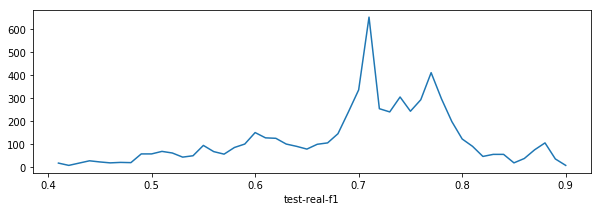

In [57]:
results.groupby(['test-real-f1']).size().plot(figsize=(10,3))

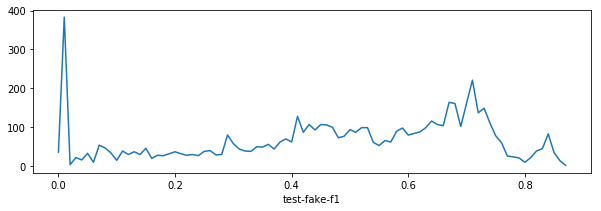

In [58]:
results.groupby(['test-fake-f1']).size().plot(figsize=(10,3))

#### Old

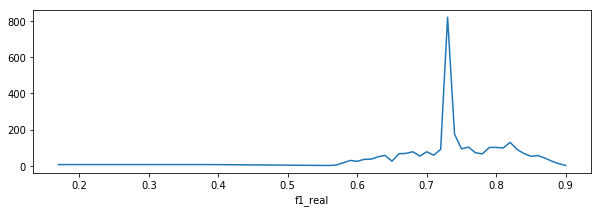

In [39]:
results.groupby(['f1_real']).size().plot(figsize=(10,3))

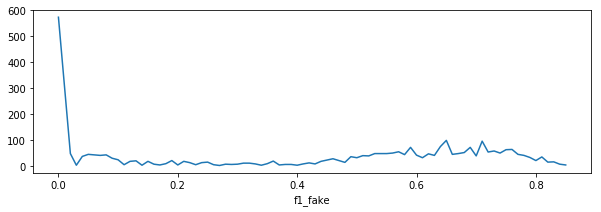

In [40]:
results.groupby(['f1_fake']).size().plot(figsize=(10,3))

#### New

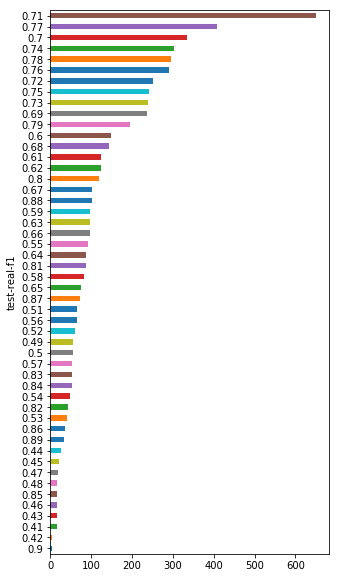

In [59]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(5, 10))
results.groupby('test-real-f1').size().sort_values().plot(kind='barh')

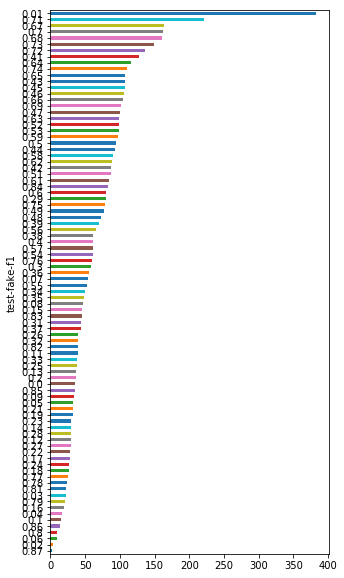

In [60]:
plt.figure(figsize=(5, 10))
results.groupby('test-fake-f1').size().sort_values().plot(kind='barh')

In [63]:
results.columns

Index(['Char-word-func-N-grams-combination', 'c', 'w', 'f', 'total_feat_num',
       'weight scheme', 'classifier', 'cv-acc', 'cv-balanced_acc',
       'cv-precision', 'cv-recall', 'cv-f1', 'cv-roc_auc', 'test-acc',
       'test-balanced_acc', 'test-real-precision', 'test-real-recall',
       'test-real-f1', 'test-fake-precision', 'test-fake-recall',
       'test-fake-f1', 'test-roc_auc', 'fpr', 'tpr', 'thresholds', 'Status'],
      dtype='object')

#### New

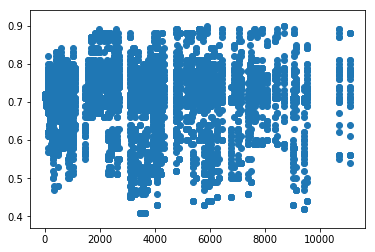

In [65]:
plt.scatter(results['total_feat_num'], results['test-real-f1'])

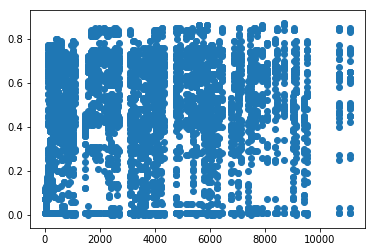

In [66]:
plt.scatter(results['total_feat_num'], results['test-fake-f1'])

#### Old

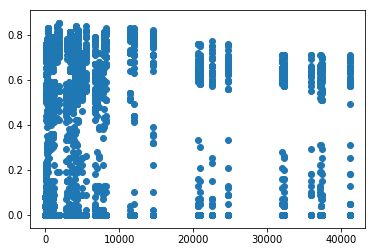

In [48]:
plt.scatter(results['total_feat_num'], results['f1_fake'])

#### New

In [68]:
results.groupby('total_feat_num')['test-fake-f1'].max()

total_feat_num
12.0       0.12
49.0       0.13
61.0       0.17
97.0       0.29
106.0      0.77
118.0      0.77
146.0      0.30
155.0      0.77
167.0      0.77
170.0      0.40
182.0      0.40
203.0      0.76
252.0      0.75
267.0      0.41
276.0      0.77
288.0      0.77
295.0      0.57
344.0      0.57
373.0      0.76
401.0      0.80
450.0      0.80
465.0      0.56
571.0      0.79
609.0      0.50
621.0      0.51
706.0      0.49
715.0      0.74
727.0      0.74
812.0      0.73
835.0      0.41
           ... 
6047.0     0.55
6056.0     0.77
6068.0     0.77
6153.0     0.75
6245.0     0.57
6351.0     0.79
6431.0     0.85
6785.0     0.53
6891.0     0.79
7024.0     0.65
7072.0     0.85
7130.0     0.79
7406.0     0.61
7454.0     0.84
7512.0     0.74
7616.0     0.85
7628.0     0.85
7713.0     0.84
7911.0     0.86
8085.0     0.78
8380.0     0.80
8451.0     0.85
8690.0     0.87
9044.0     0.54
9072.0     0.85
9150.0     0.79
9426.0     0.53
9532.0     0.79
10710.0    0.85
11092.0    0.85
Name: tes

#### oLD

In [45]:
results.groupby('total_feat_num')['f1_fake'].max()

total_feat_num
18       0.08
85       0.62
101      0.76
119      0.76
136      0.23
186      0.77
237      0.78
248      0.62
293      0.58
349      0.77
378      0.59
394      0.83
541      0.59
847      0.52
948      0.77
1020     0.52
1121     0.79
1140     0.59
1555     0.84
1848     0.85
2860     0.58
2961     0.78
3153     0.58
3203     0.59
3304     0.81
3790     0.58
3891     0.78
4020     0.71
4038     0.71
4121     0.84
4156     0.72
4313     0.70
4414     0.82
5040     0.72
5575     0.84
6690     0.64
6791     0.79
6983     0.64
7223     0.72
7810     0.72
7927     0.81
8220     0.83
11448    0.83
11947    0.83
14577    0.82
20681    0.76
20974    0.76
22548    0.77
24701    0.76
31926    0.71
32219    0.71
32310    0.71
35946    0.71
37105    0.71
37208    0.71
37398    0.70
41125    0.71
Name: f1_fake, dtype: float64

#### New

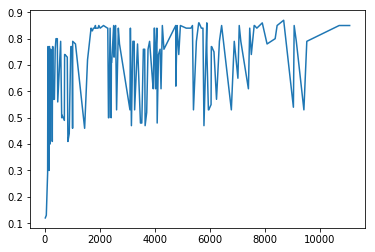

In [69]:
plt.plot(results.groupby('total_feat_num')['test-fake-f1'].max())

#### Old

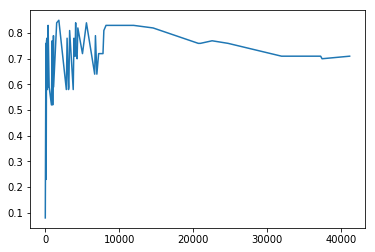

In [49]:
plt.plot(results.groupby('total_feat_num')['f1_fake'].max())

#### New

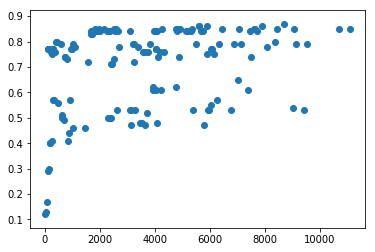

In [71]:
plt.scatter(results.groupby('total_feat_num')['test-fake-f1'].max().index, results.groupby('total_feat_num')['test-fake-f1'].max())

#### Old

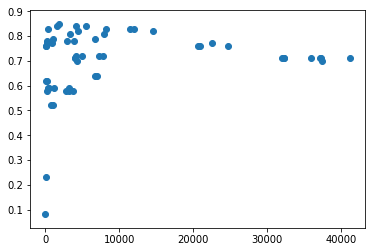

In [50]:

plt.scatter(results.groupby('total_feat_num')['f1_fake'].max().index, results.groupby('total_feat_num')['f1_fake'].max())

In [73]:
results.columns

Index(['Char-word-func-N-grams-combination', 'c', 'w', 'f', 'total_feat_num',
       'weight scheme', 'classifier', 'cv-acc', 'cv-balanced_acc',
       'cv-precision', 'cv-recall', 'cv-f1', 'cv-roc_auc', 'test-acc',
       'test-balanced_acc', 'test-real-precision', 'test-real-recall',
       'test-real-f1', 'test-fake-precision', 'test-fake-recall',
       'test-fake-f1', 'test-roc_auc', 'fpr', 'tpr', 'thresholds', 'Status'],
      dtype='object')

#### New

In [74]:
results['weight scheme'].value_counts()

tfidf        1184
logent       1184
norm         1184
binary       1184
none (tf)    1181
Name: weight scheme, dtype: int64

#### Old

In [52]:
results['weight scheme'].value_counts()

relat        480
none (tf)    480
tfidf        480
binary       480
logent       480
norm         480
Name: weight scheme, dtype: int64

#### Plotting Analysis of Feature N-gram Sizes  (!!! REWORK IN 1 PLOT)

#### New

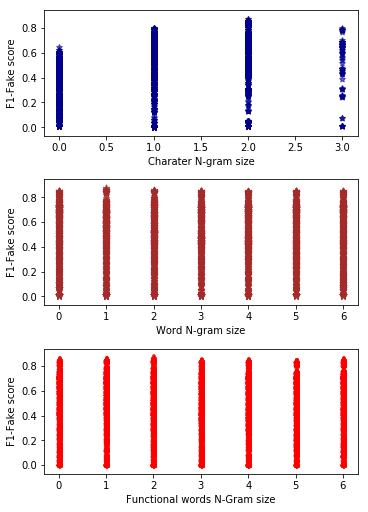

In [75]:
from matplotlib import pyplot as plt 

figure, ax = plt.subplots(ncols=1, nrows=3, figsize=(5, 7), constrained_layout=True)


ax[0].scatter(results['c'], results['test-fake-f1'], alpha=0.6, color='darkblue', marker=(5, 1))
ax[0].set_xlabel('Charater N-gram size')
ax[0].set_ylabel('F1-Fake score')



ax[1].scatter(results['w'], results['test-fake-f1'], alpha=0.6, color='brown', marker=(5, 2))
ax[1].set_xlabel('Word N-gram size')
ax[1].set_ylabel('F1-Fake score')


ax[2].scatter(results['f'], results['test-fake-f1'], alpha=0.6, color='red', marker=r'$\clubsuit$')
ax[2].set_xlabel('Functional words N-Gram size')
ax[2].set_ylabel('F1-Fake score')

figure.savefig('Ngram.png')

#### Old

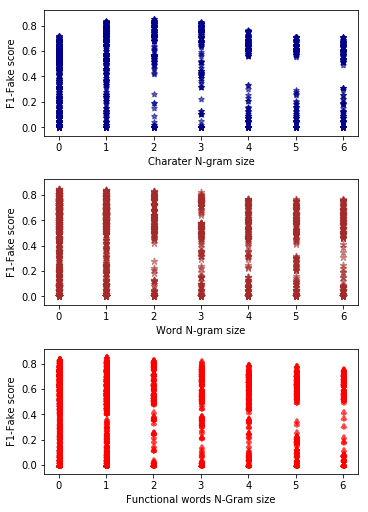

In [140]:
from matplotlib import pyplot as plt 

figure, ax = plt.subplots(ncols=1, nrows=3, figsize=(5, 7), constrained_layout=True)


ax[0].scatter(results['char N-gram'], results['f1_fake'], alpha=0.6, color='darkblue', marker=(5, 1))
ax[0].set_xlabel('Charater N-gram size')
ax[0].set_ylabel('F1-Fake score')



ax[1].scatter(results['word N-gram'], results['f1_fake'], alpha=0.6, color='brown', marker=(5, 2))
ax[1].set_xlabel('Word N-gram size')
ax[1].set_ylabel('F1-Fake score')


ax[2].scatter(results['func N-gram'], results['f1_fake'], alpha=0.6, color='red', marker=r'$\clubsuit$')
ax[2].set_xlabel('Functional words N-Gram size')
ax[2].set_ylabel('F1-Fake score')

figure.savefig('Ngram.png')

#### Plotting Analysis of Weighting Schemes

#### New

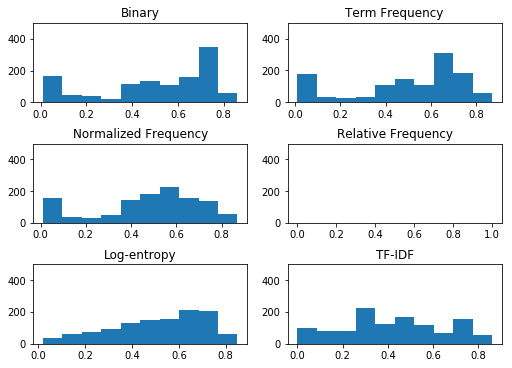

In [80]:
from matplotlib import pyplot as plt
%matplotlib inline

figure, ax = plt.subplots(ncols=2, nrows=3, figsize=(7, 5), constrained_layout=True)

ax[0][0].hist(results[results['weight scheme'] == 'binary']['test-fake-f1'])
ax[0][0].set_title('Binary'), ax[0][0].set_ylim(1, 500)
#ax[0][0].set_ylabel('Number of experiments')
#ax[0][0].set_xlabel('F1-Fake')

ax[0][1].hist(results[results['weight scheme'] == 'none (tf)']['test-fake-f1'])
ax[0][1].set_ybound(lower=0, upper=500)
ax[0][1].set_title('Term Frequency')
#ax[0][1].set_xlabel('F1-Fake')

ax[1][0].hist(results[results['weight scheme'] == 'norm']['test-fake-f1'])
ax[1][0].set_ybound(lower=0, upper=500)
ax[1][0].set_title('Normalized Frequency')
#ax[0][2].set_xlabel('F1-Fake')

ax[1][1].hist(results[results['weight scheme'] == 'relat']['test-fake-f1'])
#ax[1][0].set_ylabel('Number of experiments')
ax[1][1].set_ybound(lower=0, upper=500)
ax[1][1].set_title('Relative Frequency')
#ax[1][0].set_xlabel('F1-Fake')


ax[2][0].hist(results[results['weight scheme'] == 'logent']['test-fake-f1'])
ax[2][0].set_ybound(lower=0, upper=500)
ax[2][0].set_title('Log-entropy')
#ax[1][1].set_xlabel('F1-Fake')

ax[2][1].hist(results[results['weight scheme'] == 'tfidf']['test-fake-f1'])
ax[2][1].set_ybound(lower=0, upper=500)
ax[2][1].set_title('TF-IDF')
#ax[1][2].set_xlabel('F1-Fake')
figure.savefig('weight_new.png')

#### Old

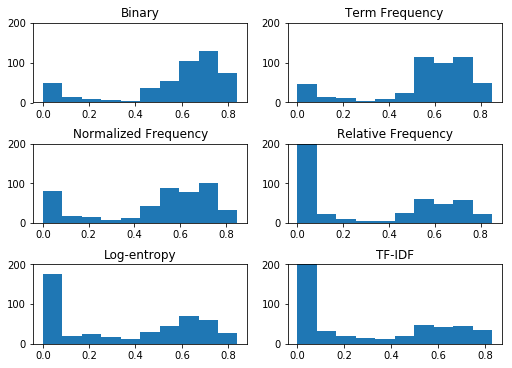

In [44]:
from matplotlib import pyplot as plt
%matplotlib inline

figure, ax = plt.subplots(ncols=2, nrows=3, figsize=(7, 5), constrained_layout=True)

ax[0][0].hist(results[results['weight scheme'] == 'binary']['f1_fake'])
ax[0][0].set_title('Binary'), ax[0][0].set_ylim(1, 200)
#ax[0][0].set_ylabel('Number of experiments')
#ax[0][0].set_xlabel('F1-Fake')

ax[0][1].hist(results[results['weight scheme'] == 'none (tf)']['f1_fake'])
ax[0][1].set_ybound(lower=0, upper=200)
ax[0][1].set_title('Term Frequency')
#ax[0][1].set_xlabel('F1-Fake')

ax[1][0].hist(results[results['weight scheme'] == 'norm']['f1_fake'])
ax[1][0].set_ybound(lower=0, upper=200)
ax[1][0].set_title('Normalized Frequency')
#ax[0][2].set_xlabel('F1-Fake')

ax[1][1].hist(results[results['weight scheme'] == 'relat']['f1_fake'])
#ax[1][0].set_ylabel('Number of experiments')
ax[1][1].set_ybound(lower=0, upper=200)
ax[1][1].set_title('Relative Frequency')
#ax[1][0].set_xlabel('F1-Fake')


ax[2][0].hist(results[results['weight scheme'] == 'logent']['f1_fake'])
ax[2][0].set_ybound(lower=0, upper=200)
ax[2][0].set_title('Log-entropy')
#ax[1][1].set_xlabel('F1-Fake')

ax[2][1].hist(results[results['weight scheme'] == 'tfidf']['f1_fake'])
ax[2][1].set_ybound(lower=0, upper=200)
ax[2][1].set_title('TF-IDF')
#ax[1][2].set_xlabel('F1-Fake')
figure.savefig('weight_new.png')

#### Plotting Analysis of Classifiers!!!

#### NEw

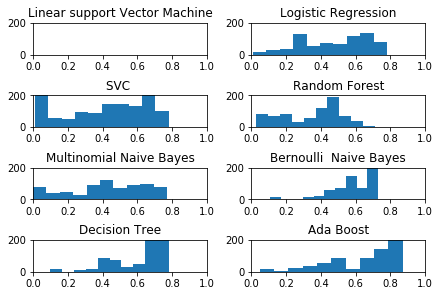

In [78]:
 # add  similar analysis for classifiers

from matplotlib import pyplot as plt
figure, ax = plt.subplots(ncols=2, nrows=4, figsize=(6, 4), constrained_layout=True)

ax[0][0].hist(results[results['classifier'] == 'LinearSVC']['test-fake-f1'])
ax[0][0].set_ybound(lower=0, upper=200)
ax[0][0].set_xbound(lower=0.0, upper=1.0)
ax[0][0].set_title('Linear support Vector Machine')
#ax[0][0].set_ylabel('Number of experiments')
#ax[0][0].set_xlabel('F1-Fake')


ax[0][1].hist(results[results['classifier'] == 'LogisticRegression']['test-fake-f1'])
ax[0][1].set_ybound(lower=0, upper=200)
ax[0][1].set_xbound(lower=0.0, upper=1.0)
ax[0][1].set_title('Logistic Regression')
#ax[0][1].set_xlabel('F1-Fake')

ax[1][0].hist(results[results['classifier'] == 'SVC']['test-fake-f1'])
ax[1][0].set_ybound(lower=0, upper=200)
ax[1][0].set_xbound(lower=0.0, upper=1.0)
ax[1][0].set_title('SVC ')
#ax[1][0].set_xlabel('F1-Fake')

ax[1][1].hist(results[results['classifier'] == 'RandomForestClassifier']['test-fake-f1'])
ax[1][1].set_ybound(lower=0, upper=200)
ax[1][1].set_xbound(lower=0.0, upper=1.0)
ax[1][1].set_title('Random Forest')
#ax[0][3].set_xlabel('F1-Fake')


ax[2][0].hist(results[results['classifier'] == 'MultinomialNB']['test-fake-f1'])
ax[2][0].set_ybound(lower=0, upper=200)
ax[2][0].set_xbound(lower=0.0, upper=1.0)
ax[2][0].set_title('Multinomial Naive Bayes')
#ax[2][0].set_ylabel('Number of experiments')
#ax[2][0].set_xlabel('F1-Fake')

ax[2][1].hist(results[results['classifier'] == 'BernoulliNB']['test-fake-f1'])
ax[2][1].set_ybound(lower=0, upper=200)
ax[2][1].set_xbound(lower=0.0, upper=1.0)
ax[2][1].set_title('Bernoulli  Naive Bayes')
#ax[2][1].set_xlabel('F1-Fake')


ax[3][0].hist(results[results['classifier'] == 'DecisionTreeClassifier']['test-fake-f1'])
ax[3][0].set_ybound(lower=0, upper=200)
ax[3][0].set_xbound(lower=0.0, upper=1.0)
ax[3][0].set_title('Decision Tree')
#ax[1][2].set_xlabel('F1-Fake')

ax[3][1].hist(results[results['classifier'] == 'AdaBoostClassifier']['test-fake-f1'])
ax[3][1].set_ybound(lower=0, upper=200)
ax[3][1].set_xbound(lower=0.0, upper=1.0)
ax[3][1].set_title('Ada Boost')
#ax[3][1].set_xlabel('F1-Fake')



figure.savefig('class.png')

#### Old

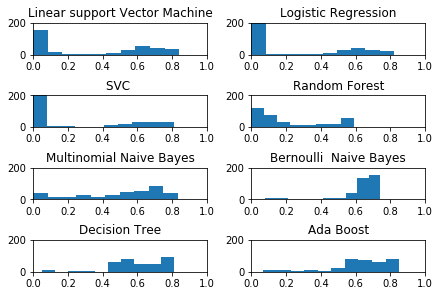

In [48]:
 # add  similar analysis for classifiers

from matplotlib import pyplot as plt
figure, ax = plt.subplots(ncols=2, nrows=4, figsize=(6, 4), constrained_layout=True)

ax[0][0].hist(results[results['classifier'] == 'LinearSVC']['f1_fake'])
ax[0][0].set_ybound(lower=0, upper=200)
ax[0][0].set_xbound(lower=0.0, upper=1.0)
ax[0][0].set_title('Linear support Vector Machine')
#ax[0][0].set_ylabel('Number of experiments')
#ax[0][0].set_xlabel('F1-Fake')


ax[0][1].hist(results[results['classifier'] == 'LogisticRegression']['f1_fake'])
ax[0][1].set_ybound(lower=0, upper=200)
ax[0][1].set_xbound(lower=0.0, upper=1.0)
ax[0][1].set_title('Logistic Regression')
#ax[0][1].set_xlabel('F1-Fake')

ax[1][0].hist(results[results['classifier'] == 'SVC']['f1_fake'])
ax[1][0].set_ybound(lower=0, upper=200)
ax[1][0].set_xbound(lower=0.0, upper=1.0)
ax[1][0].set_title('SVC ')
#ax[1][0].set_xlabel('F1-Fake')

ax[1][1].hist(results[results['classifier'] == 'RandomForestClassifier']['f1_fake'])
ax[1][1].set_ybound(lower=0, upper=200)
ax[1][1].set_xbound(lower=0.0, upper=1.0)
ax[1][1].set_title('Random Forest')
#ax[0][3].set_xlabel('F1-Fake')


ax[2][0].hist(results[results['classifier'] == 'MultinomialNB']['f1_fake'])
ax[2][0].set_ybound(lower=0, upper=200)
ax[2][0].set_xbound(lower=0.0, upper=1.0)
ax[2][0].set_title('Multinomial Naive Bayes')
#ax[2][0].set_ylabel('Number of experiments')
#ax[2][0].set_xlabel('F1-Fake')

ax[2][1].hist(results[results['classifier'] == 'BernoulliNB']['f1_fake'])
ax[2][1].set_ybound(lower=0, upper=200)
ax[2][1].set_xbound(lower=0.0, upper=1.0)
ax[2][1].set_title('Bernoulli  Naive Bayes')
#ax[2][1].set_xlabel('F1-Fake')


ax[3][0].hist(results[results['classifier'] == 'DecisionTreeClassifier']['f1_fake'])
ax[3][0].set_ybound(lower=0, upper=200)
ax[3][0].set_xbound(lower=0.0, upper=1.0)
ax[3][0].set_title('Decision Tree')
#ax[1][2].set_xlabel('F1-Fake')

ax[3][1].hist(results[results['classifier'] == 'AdaBoostClassifier']['f1_fake'])
ax[3][1].set_ybound(lower=0, upper=200)
ax[3][1].set_xbound(lower=0.0, upper=1.0)
ax[3][1].set_title('Ada Boost')
#ax[3][1].set_xlabel('F1-Fake')



figure.savefig('class.png')

### ROC-curve plots

#### RUN FROM HERE TO CREATE ROC PLOTS

In [11]:
import json 
from pathlib import Path

y_proba = json.load(open(Path('results/y_probabilities_for_roccurve.json')))
y_proba.keys()

dict_keys(['test_y', '1007', '1015', '1023', '1967', '1975', '201', '159', '775', '247', '1801'])

In [5]:
test_y = y_proba['test_y']

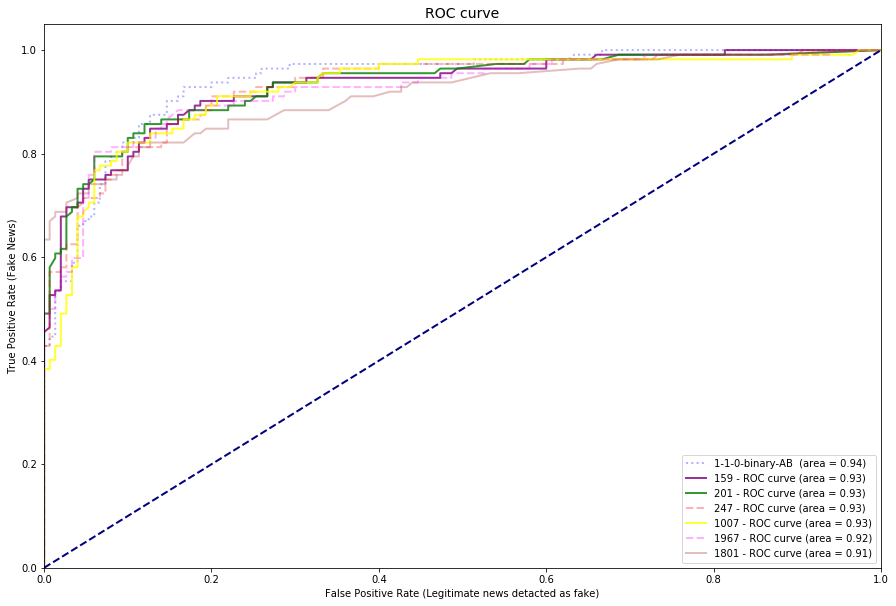

In [12]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#roc_auc_score(y_test, y_pred_scores[:, 1])

plt.figure(figsize=[15,10])
lw = 2


# 775
fpr, tpr, thresholds = roc_curve(test_y, y_proba['775'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='1-1-0-binary-AB  (area = %0.2f)' % roc_auc, alpha=0.3, linestyle=':')

# 159
fpr, tpr, thresholds = roc_curve(test_y, y_proba['159'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y, y_proba['159'])

# !!! PLS, RENAME THE LEGEND: smth short but meaningful for the reader, they won't understand experiment IDs
plt.plot(fpr, tpr, color='purple',
         lw=lw, label='159 - ROC curve (area = %0.2f)' % roc_auc, alpha=0.8)

# 201    
fpr, tpr, thresholds = roc_curve(test_y, y_proba['201'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y, y_proba['201'])
plt.plot(fpr, tpr, color='green',
         lw=lw, label='201 - ROC curve (area = %0.2f)' % roc_auc, alpha=0.8)


# 247
fpr, tpr, thresholds = roc_curve(test_y, y_proba['247'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red',
         lw=lw, label='247 - ROC curve (area = %0.2f)' % roc_auc, alpha=0.3, linestyle='--')


# 1007
fpr, tpr, thresholds = roc_curve(test_y, y_proba['1007'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='yellow',
         lw=lw, label='1007 - ROC curve (area = %0.2f)' % roc_auc, alpha=0.8)
  
        
# 1967
fpr, tpr, thresholds = roc_curve(test_y, y_proba['1967'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='magenta',
         lw=lw, label='1967 - ROC curve (area = %0.2f)' % roc_auc, alpha=0.3, linestyle='--')
    


# 1801
fpr, tpr, thresholds = roc_curve(test_y, y_proba['1801'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='brown',
         lw=lw, label='1801 - ROC curve (area = %0.2f)' % roc_auc, alpha=0.3)      
    
    
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Legitimate news detacted as fake)')
plt.ylabel('True Positive Rate (Fake News)')
plt.title('ROC curve', size=14)
plt.legend(loc="lower right")
#plt.show()

plt.savefig(Path('figures/ROC-curves.png'), dpi=300)



